<h1>Importarea modulelor care ne ajuta la analiza setului de date + vizualizarea setului de date

In [1]:
#importarea modulelor care ne ajuta la analiza setului de date
import numpy as np
import pandas as pd

#importarea modulelor care ne ajuta la vizualizarea setului de date
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h3>Preluarea setului de data + o mica descriere si vizualizare a acestuia

In [3]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().value_counts()

Hours  Scores
False  False     25
Name: count, dtype: int64

<h1>Exploram putin setul nostru de date</h1>

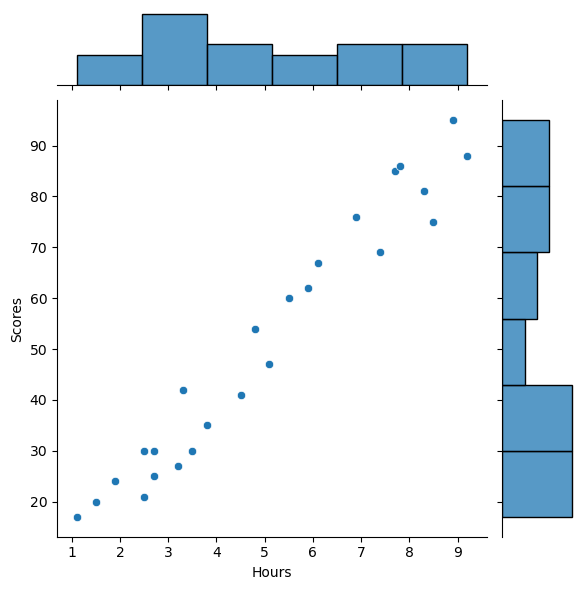

In [8]:
sns.jointplot(x = 'Hours', y = 'Scores', data = df)

<h1>Splituirea setului de date

In [20]:
X = df[['Hours']]
y = df[['Scores']]

In [21]:
print(X.shape)
print(y.shape)

(25, 1)
(25, 1)


In [22]:

print(X.head())
print(y.head())

   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
   Scores
0      21
1      47
2      27
3      75
4      30


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.5)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 1)
(13, 1)
(12, 1)
(13, 1)


In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
w = float(lm.coef_)
b = float(lm.intercept_)

print(f' f(x) = {w}x * {b}')

 f(x) = 9.23764888870697x * 6.122303630633219


/tmp/ipykernel_44144/4018112135.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w = float(lm.coef_)
/tmp/ipykernel_44144/4018112135.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(lm.intercept_)


In [42]:
predictie = lm.predict(X_test)

<h1>Vizualizarea setului de dateeee + a modelului pe care noi tocmai l-am creat</h1>

In [43]:
print(X_test.shape)
print(y_test.shape)
print(predictie.shape)

(13, 1)
(13, 1)
(13, 1)


In [1]:
X_test = np.array(X_test).reshape(-1)
y_test = np.array(y_test).reshape(-1)
predictie = predictie.reshape(-1)

NameError: name 'np' is not defined

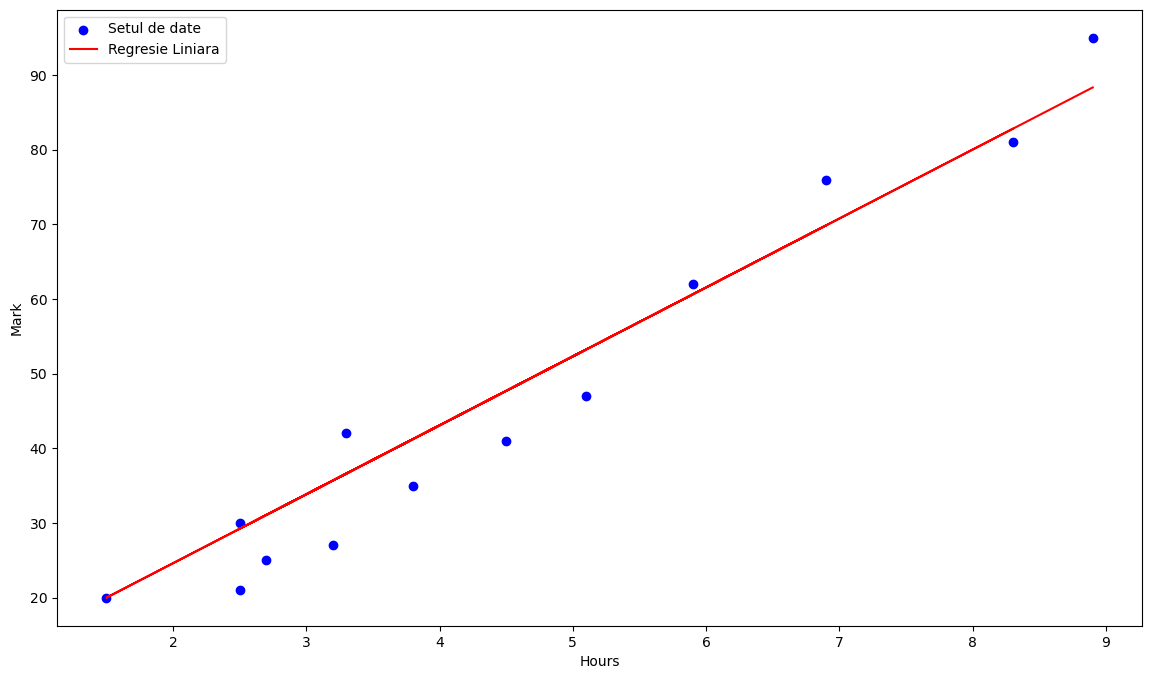

In [45]:
plt.figure(figsize=(14,8))
plt.scatter(X_test, y_test, label = 'Setul de date', color = 'blue')
plt.plot(X_test, predictie, label = 'Regresie Liniara', color = 'red')
plt.ylabel('Mark')
plt.xlabel('Hours')
plt.legend()

plt.show()

In [46]:
r2 = r2_score(y_test, predictie)
mae = mean_absolute_error(y_test, predictie)
mse = mean_squared_error(y_test, predictie)

print(f'R2_score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

R2_score: 0.9426307007429557
Mean Absolute Error: 4.944901339093145
Mean Squared Error: 32.227288723471894
